## Import Requirements

In [28]:
import numpy as np
import pandas as pd

## Carga de Data

In [29]:
archivo = "demandas.csv"
df = pd.read_csv(archivo, delimiter=",")
df.head(10)

,indice,area,horario,rango_edad,performance_persona,cantidad_personas,mt2_solicitados
0,0,Areas Verdes,Dia,1,533,1,50
1,1,Areas Verdes,Dia,1,582,1,50
2,2,Areas Verdes,Dia,1,438,1,50
3,3,Areas Verdes,Dia,1,411,1,50
4,4,Areas Verdes,Dia,1,414,1,50
5,5,Areas Verdes,Dia,1,535,1,50
6,6,Areas Verdes,Dia,1,438,1,50
7,7,Areas Verdes,Dia,1,571,1,50
8,8,Areas Verdes,Dia,1,455,1,50
9,9,Areas Verdes,Dia,1,422,1,50


## Limpieza y Categorización

In [30]:
def get_area_category(row):
    AREAS = {
        'Areas Verdes': 'green_areas',
        'Calles y Aceras': 'public_areas',
        'Oficinas': 'offices'
    }
    return AREAS[row['area']] if row['area'] in AREAS.keys() else 'offices'

def get_turn_category(row):
    TURNS = {
        'Dia': 'morning',
        'Noche': 'night',
        'Tarde': 'afternoon'
    }
    return TURNS[row['horario']]

df = df.dropna()
df['area_category'] = df.apply(get_area_category, axis=1)
df['turn_category'] = df.apply(get_turn_category, axis=1)
df.head(10)


,indice,area,horario,rango_edad,performance_persona,cantidad_personas,mt2_solicitados,area_category,turn_category
0,0,Areas Verdes,Dia,1,533,1,50,green_areas,morning
1,1,Areas Verdes,Dia,1,582,1,50,green_areas,morning
2,2,Areas Verdes,Dia,1,438,1,50,green_areas,morning
3,3,Areas Verdes,Dia,1,411,1,50,green_areas,morning
4,4,Areas Verdes,Dia,1,414,1,50,green_areas,morning
5,5,Areas Verdes,Dia,1,535,1,50,green_areas,morning
6,6,Areas Verdes,Dia,1,438,1,50,green_areas,morning
7,7,Areas Verdes,Dia,1,571,1,50,green_areas,morning
8,8,Areas Verdes,Dia,1,455,1,50,green_areas,morning
9,9,Areas Verdes,Dia,1,422,1,50,green_areas,morning


## Limpieza de Columnas

In [31]:
df = df.drop(['indice', 'area', 'horario', 'performance_persona'], axis=1)
df.head(10)

,rango_edad,cantidad_personas,mt2_solicitados,area_category,turn_category
0,1,1,50,green_areas,morning
1,1,1,50,green_areas,morning
2,1,1,50,green_areas,morning
3,1,1,50,green_areas,morning
4,1,1,50,green_areas,morning
5,1,1,50,green_areas,morning
6,1,1,50,green_areas,morning
7,1,1,50,green_areas,morning
8,1,1,50,green_areas,morning
9,1,1,50,green_areas,morning


## Implementando un Modelo

In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Separar Data y Target

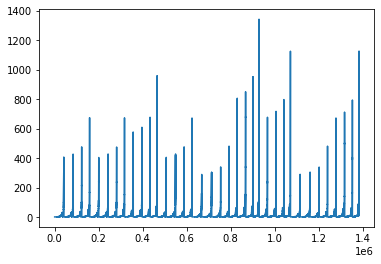

In [82]:
df_cleaned = df[['turn_category', 'area_category', 'rango_edad', 'mt2_solicitados', 'cantidad_personas']]
df_cleaned['cantidad_personas'].plot(kind = 'line')

# df_to_categorize = df_cleaned['turn_category', 'area_category']
df_data_to_model_range_edad = df_cleaned['rango_edad']
df_data_to_model_mts_requested = df_cleaned['mt2_solicitados']
df_x = df_cleaned.drop(['cantidad_personas', 'rango_edad', 'mt2_solicitados'], axis=1)
df_y = df_cleaned['cantidad_personas']

plt.show()


## Crear Columnas para columnas categorizadas

In [83]:
df_cleaned_columnized = pd.get_dummies(df_x, drop_first=False)
df_x = df_x.drop(['turn_category', 'area_category'], axis=1)
# df_x
df_x = pd.concat([df_data_to_model_range_edad, df_x], axis=1)
df_x = pd.concat([df_data_to_model_mts_requested, df_x], axis=1)
df_x = pd.concat([df_x, df_cleaned_columnized], axis=1)
df_x

,mt2_solicitados,rango_edad,turn_category_afternoon,turn_category_morning,turn_category_night,area_category_green_areas,area_category_offices,area_category_public_areas
0,50,1,0,1,0,1,0,0
1,50,1,0,1,0,1,0,0
2,50,1,0,1,0,1,0,0
3,50,1,0,1,0,1,0,0
4,50,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1384049,200000,4,1,0,0,0,1,0
1384050,200000,4,1,0,0,0,1,0
1384051,200000,4,1,0,0,0,1,0
1384052,200000,4,1,0,0,0,1,0


## Entrenamiento del Modelo

In [84]:
from sklearn.model_selection import train_test_split



x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 42)

print("shape de entrenamiento: ", x_train.shape)
print("shape de test: ", x_test.shape)

shape de entrenamiento:  (1107243, 8)
shape de test:  (276811, 8)


In [86]:
# from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

## Model Test

In [87]:
y_prediction =  LR.predict(x_test)
y_prediction

array([ 7.81366511, 58.84126903,  5.32329753, ...,  6.47612824,
        7.33910232,  9.66177664])

In [88]:
x_test

,mt2_solicitados,rango_edad,turn_category_afternoon,turn_category_morning,turn_category_night,area_category_green_areas,area_category_offices,area_category_public_areas
613096,1800,4,0,1,0,0,0,1
1278015,22000,1,1,0,0,0,1,0
841236,600,2,1,0,0,0,0,1
654999,5000,1,0,0,1,0,0,1
56939,900,2,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1314949,1900,2,1,0,0,0,1,0
545680,1900,2,0,1,0,0,0,1
1290643,600,2,1,0,0,0,1,0
850198,1400,2,1,0,0,0,0,1


## Metricas

In [89]:
LR.score(df_x, df_y)

0.850054705877028

In [90]:
LR.coef_

array([ 2.51975598e-03,  1.55763710e+00,  3.84489723e+00,  1.96283434e-01,
       -4.04118067e+00, -2.10219554e-01,  6.81525128e-01, -4.71305575e-01])

In [91]:
LR.intercept_

-2.677421919951506

## Testing Model

In [98]:
# initialize list of lists
columns_new_df = [
    'mt2_solicitados',
    'rango_edad',
    'turn_category_afternoon',
    'turn_category_morning',
    'turn_category_night',
    'area_category_green_areas',
    'area_category_offices',
    'area_category_public_areas'
]
data_new_df = [[5000, 1, 1, 0, 0, 1, 0, 0]]
  
# Create the pandas DataFrame
new_df = pd.DataFrame(data_new_df, columns=columns_new_df)
  
new_df

,mt2_solicitados,rango_edad,turn_category_afternoon,turn_category_morning,turn_category_night,area_category_green_areas,area_category_offices,area_category_public_areas
0,5000,1,1,0,0,1,0,0


In [99]:
prediction_test =  LR.predict(new_df)
prediction_test[0]

15.11367274862532

## Export Model

In [100]:
import pickle
pickle.dump(LR, open('cleaning_people_model.pkl', 'wb'))